<a href="https://colab.research.google.com/github/juwoncozyboy/Machine_learning_advance/blob/main/Rent_vs_BHK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형회귀분석을 사용하여 mse값을 도출해서 BHK 와 Rent값의 관계 분석

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
rent_df = pd.read_csv('rent.csv')
rent_df

Posted On  BHK   Rent  Size            Floor    Area Type  \
0     2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1     2022-05-13    2  20000   800       1 out of 3   Super Area   
2     2022-05-16    2  17000  1000       1 out of 3   Super Area   
3     2022-07-04    2  10000   800       1 out of 2   Super Area   
4     2022-05-09    2   7500   850       1 out of 2  Carpet Area   
...          ...  ...    ...   ...              ...          ...   
4741  2022-05-18    2  15000  1000       3 out of 5  Carpet Area   
4742  2022-05-15    3  29000  2000       1 out of 4   Super Area   
4743  2022-07-10    3  35000  1750       3 out of 5  Carpet Area   
4744  2022-07-06    3  45000  1500     23 out of 34  Carpet Area   
4745  2022-05-04    2  15000  1000       4 out of 5  Carpet Area   

                 Area Locality       City Furnishing Status  Tenant Preferred  \
0                       Bandel    Kolkata       Unfurnished  Bachelors/Family   
1     Phool Bagan, Kankurgachi    Kolkata    Semi-Furnished  Bachelors/Family   
2      Salt Lake City Sector 2    Kolkata    Semi-Furnished  Bachelors/Family   
3                  Dumdum Park    Kolkata       Unfurnished  Bachelors/Family   
4                South Dum Dum    Kolkata       Unfurnished         Bachelors   
...                        ...        ...               ...               ...   
4741              Bandam Kommu  Hyderabad    Semi-Furnished  Bachelors/Family   
4742      Manikonda, Hyderabad  Hyderabad    Semi-Furnished  Bachelors/Family   
4743      Himayath Nagar, NH 7  Hyderabad    Semi-Furnished  Bachelors/Family   
4744                Gachibowli  Hyderabad    Semi-Furnished            Family   
4745           Suchitra Circle  Hyderabad       Unfurnished         Bachelors   

      Bathroom Point of Contact  
0            2    Contact Owner  
1            1    Contact Owner  
2            1    Contact Owner  
3            1    Contact Owner  
4            1    Contact Owner  
...        ...              ...  
4741         2    Contact Owner  
4742         3    Contact Owner  
4743         3    Contact Agent  
4744         2    Contact Agent  
4745         2    Contact Owner  

[4746 rows x 12 columns]

In [ ]:
rent_df = rent_df.drop('Posted On', axis = 1)
rent_df

BHK   Rent  Size            Floor    Area Type  \
0       2  10000  1100  Ground out of 2   Super Area   
1       2  20000   800       1 out of 3   Super Area   
2       2  17000  1000       1 out of 3   Super Area   
3       2  10000   800       1 out of 2   Super Area   
4       2   7500   850       1 out of 2  Carpet Area   
...   ...    ...   ...              ...          ...   
4741    2  15000  1000       3 out of 5  Carpet Area   
4742    3  29000  2000       1 out of 4   Super Area   
4743    3  35000  1750       3 out of 5  Carpet Area   
4744    3  45000  1500     23 out of 34  Carpet Area   
4745    2  15000  1000       4 out of 5  Carpet Area   

                 Area Locality       City Furnishing Status  Tenant Preferred  \
0                       Bandel    Kolkata       Unfurnished  Bachelors/Family   
1     Phool Bagan, Kankurgachi    Kolkata    Semi-Furnished  Bachelors/Family   
2      Salt Lake City Sector 2    Kolkata    Semi-Furnished  Bachelors/Family   
3                  Dumdum Park    Kolkata       Unfurnished  Bachelors/Family   
4                South Dum Dum    Kolkata       Unfurnished         Bachelors   
...                        ...        ...               ...               ...   
4741              Bandam Kommu  Hyderabad    Semi-Furnished  Bachelors/Family   
4742      Manikonda, Hyderabad  Hyderabad    Semi-Furnished  Bachelors/Family   
4743      Himayath Nagar, NH 7  Hyderabad    Semi-Furnished  Bachelors/Family   
4744                Gachibowli  Hyderabad    Semi-Furnished            Family   
4745           Suchitra Circle  Hyderabad       Unfurnished         Bachelors   

      Bathroom Point of Contact  
0            2    Contact Owner  
1            1    Contact Owner  
2            1    Contact Owner  
3            1    Contact Owner  
4            1    Contact Owner  
...        ...              ...  
4741         2    Contact Owner  
4742         3    Contact Owner  
4743         3    Contact Agent  
4744         2    Contact Agent  
4745         2    Contact Owner  

[4746 rows x 11 columns]

# BHK vs Rent

In [ ]:
df1 = rent_df[['Rent','BHK']]
df1

Rent  BHK
0     10000    2
1     20000    2
2     17000    2
3     10000    2
4      7500    2
...     ...  ...
4741  15000    2
4742  29000    3
4743  35000    3
4744  45000    3
4745  15000    2

[4746 rows x 2 columns]

In [ ]:
df1 = pd.get_dummies(df1, columns = ['BHK'])

In [ ]:
df1

Rent  BHK_1  BHK_2  BHK_3  BHK_4  BHK_5  BHK_6
0     10000      0      1      0      0      0      0
1     20000      0      1      0      0      0      0
2     17000      0      1      0      0      0      0
3     10000      0      1      0      0      0      0
4      7500      0      1      0      0      0      0
...     ...    ...    ...    ...    ...    ...    ...
4741  15000      0      1      0      0      0      0
4742  29000      0      0      1      0      0      0
4743  35000      0      0      1      0      0      0
4744  45000      0      0      1      0      0      0
4745  15000      0      1      0      0      0      0

[4746 rows x 7 columns]

In [ ]:
df1.corr()

Rent     BHK_1     BHK_2     BHK_3     BHK_4     BHK_5     BHK_6
Rent   1.000000 -0.152478 -0.157573  0.146604  0.349090  0.213100  0.020063
BHK_1 -0.152478  1.000000 -0.545601 -0.313277 -0.116291 -0.036203 -0.023464
BHK_2 -0.157573 -0.545601  1.000000 -0.524197 -0.194586 -0.060577 -0.039262
BHK_3  0.146604 -0.313277 -0.524197  1.000000 -0.111729 -0.034782 -0.022543
BHK_4  0.349090 -0.116291 -0.194586 -0.111729  1.000000 -0.012911 -0.008368
BHK_5  0.213100 -0.036203 -0.060577 -0.034782 -0.012911  1.000000 -0.002605
BHK_6  0.020063 -0.023464 -0.039262 -0.022543 -0.008368 -0.002605  1.000000

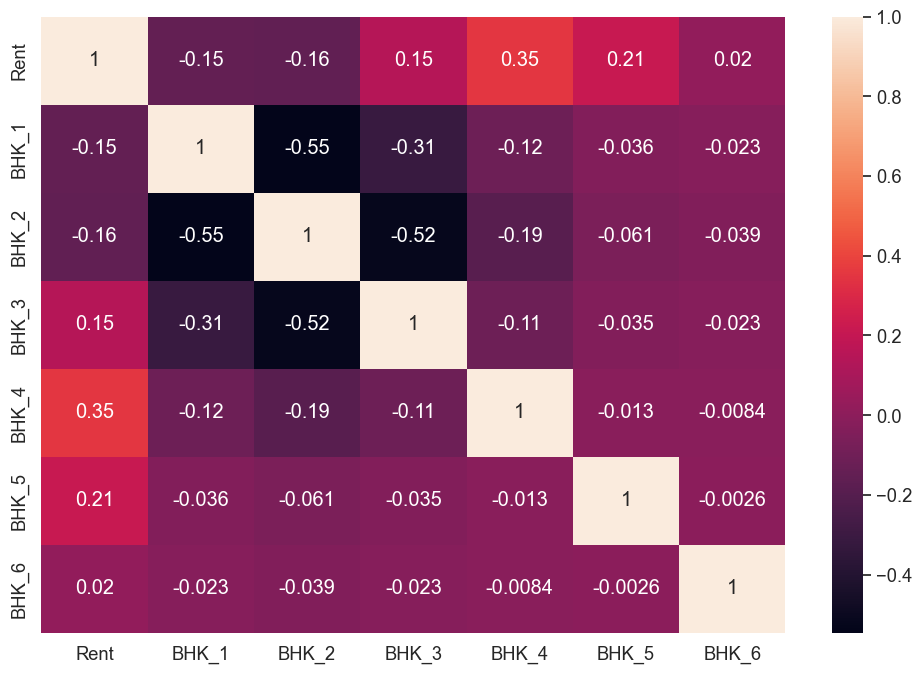

In [ ]:
sns.set(font_scale = 1.2)
plt.figure(figsize=(12, 8))
sns.heatmap(df1.corr(), annot=True)
plt.show()

In [ ]:
features = df1.drop(['Rent'], axis = 1)
labels = df1['Rent']

In [ ]:
features

BHK_1  BHK_2  BHK_3  BHK_4  BHK_5  BHK_6
0         0      1      0      0      0      0
1         0      1      0      0      0      0
2         0      1      0      0      0      0
3         0      1      0      0      0      0
4         0      1      0      0      0      0
...     ...    ...    ...    ...    ...    ...
4741      0      1      0      0      0      0
4742      0      0      1      0      0      0
4743      0      0      1      0      0      0
4744      0      0      1      0      0      0
4745      0      1      0      0      0      0

[4746 rows x 6 columns]

In [ ]:
labels

0       10000
1       20000
2       17000
3       10000
4        7500
        ...  
4741    15000
4742    29000
4743    35000
4744    45000
4745    15000
Name: Rent, Length: 4746, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.5, random_state = 11)


In [ ]:
X_train

BHK_1  BHK_2  BHK_3  BHK_4  BHK_5  BHK_6
403       0      1      0      0      0      0
1652      1      0      0      0      0      0
2193      0      0      1      0      0      0
1503      0      1      0      0      0      0
2540      1      0      0      0      0      0
...     ...    ...    ...    ...    ...    ...
332       1      0      0      0      0      0
1293      0      1      0      0      0      0
4023      0      1      0      0      0      0
3775      0      1      0      0      0      0
1945      1      0      0      0      0      0

[2373 rows x 6 columns]

In [ ]:
y_train

403      9000
1652     7500
2193    28000
1503    13000
2540    16000
        ...  
332      6500
1293    80000
4023    16000
3775    11500
1945    22000
Name: Rent, Length: 2373, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
dt_clf = DecisionTreeClassifier(random_state = 11)
dt_clf

DecisionTreeClassifier(random_state=11)

In [ ]:
dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)

In [ ]:
print(f"정확도 : {accuracy_score(y_test, pred)}")

정확도 : 0.06573957016434892


# 방 수에 따라 분류해야한다 생각해서 분류를 해야한다고 생각했는데 방수와 렌트값의 선형관계의 예측값을 알아야 하므로 회귀가 더 적합하다고 다시 생각했음

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
print(f"MSE : {mse}")

MSE : 2612794582.3430257
